In [1]:
from brainspace.plotting import plot_hemispheres
from brainspace.datasets import load_parcellation
from brainspace.utils.parcellation import map_to_labels 
from brainspace.datasets import load_conte69
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nilearn import plotting
import seaborn as sns
import nibabel as nb

plt.rcParams["pdf.fonttype"]=42  #export as editable text
plt.rcParams["ps.fonttype"]=42
plt.rcParams["svg.fonttype"]="none" #export as editable text

plt.rc("font",size=10)
plt.rc("axes", labelsize=22)
plt.rc("xtick", labelsize=13)
plt.rc("ytick", labelsize=13)
plt.rcParams['axes.linewidth'] = 0.8
screenshot = False
cmap=  "RdBu_r"

/data/u_ajohn_software/anaconda3/envs/thalamus_AJ/lib/python3.7/site-packages/nilearn/datasets/__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


# structural connectivity

## G1

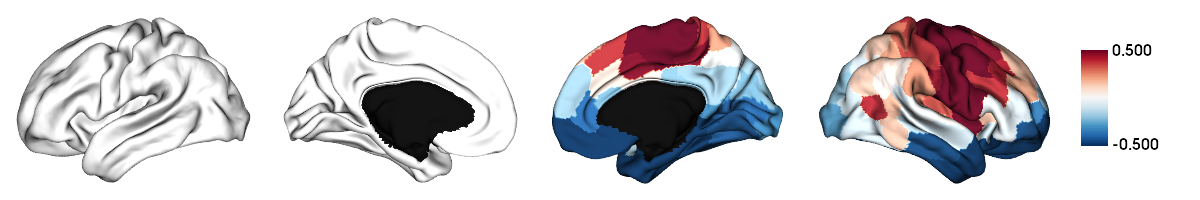

In [10]:
# correlation with Gsconn and project on surface (correlate each parcel column with G1)
# load in structural connectivity matrix
s_conn_matrix=np.load("/Project1_thalamus_gradients/data/structural_connectivity/parcels_200/struc_conn_matrix_rh_avg.npy")
#load in gradient values 
gradients = np.load("/Project1_thalamus_gradients/data/structural_connectivity/parcels_200/gradients_rh.npy")
schaefer_pc=np.zeros((1,200))

# iterate over comlumns (~parcels)
right_hem=np.arange(100,200)
for i,p in enumerate(right_hem): #right hem
    r=np.corrcoef(s_conn_matrix[:,i],gradients[:,0])[0][1]  #change here for other gradient
    schaefer_pc[0,p]=r           # fill into vector
np.save("/Project1_thalamus_gradients/data/structural_connectivity/parcels_200/grad1_on_cortex_rh.npy",schaefer_pc) #change name 

surf_lh, surf_rh = load_conte69()
labeling = load_parcellation('schaefer', scale=200, join=True)
mask = labeling != 0
grad = map_to_labels(schaefer_pc[0,:], labeling, mask , fill=np.nan)

plot_hemispheres(surf_lh, surf_rh, array_name=grad,
                 cmap=cmap,color_bar=True,
                 background=(1,1,1),size=(1200,200),zoom=1.5,
                 color_range=(-0.5,0.5),  
                 embed_nb=True,
                 interactive=False,
                 screenshot=screenshot, 
                 transparent_bg=True,
                 filename = "/Project1_thalamus_gradients/plots/figure3/grad1_on_cortex_rh_rdbu.png")


## G2

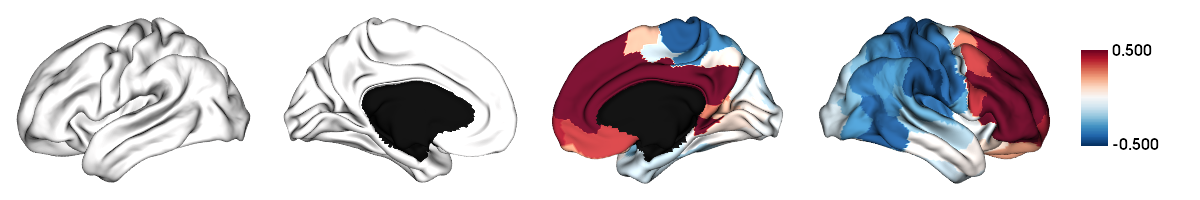

In [11]:
# correlation with Gsconn and project on surface (correlate each parcel column with G2)
# load in structural connectivity matrix
s_conn_matrix=np.load("/Project1_thalamus_gradients/data/structural_connectivity/parcels_200/struc_conn_matrix_rh_avg.npy")
#load in gradient values 
gradients = np.load("/Project1_thalamus_gradients/data/structural_connectivity/parcels_200/gradients_rh.npy")
schaefer_pc=np.zeros((1,200))

# iterate over comlumns (~parcels)
right_hem=np.arange(100,200)
for i,p in enumerate(right_hem): #left hem
    r=np.corrcoef(s_conn_matrix[:,i],gradients[:,1])[0][1]
    schaefer_pc[0,p]=r           # fill into vector

np.save("/Project1_thalamus_gradients/data/structural_connectivity/parcels_200/grad2_on_cortex_rh.npy",schaefer_pc) #change name 
    
surf_lh, surf_rh = load_conte69()
labeling = load_parcellation('schaefer', scale=200, join=True)
mask = labeling != 0
grad = map_to_labels(schaefer_pc[0,:], labeling, mask , fill=np.nan)

plot_hemispheres(surf_lh, surf_rh, array_name=grad,
                 cmap="RdBu_r",color_bar=True,
                 background=(1,1,1),size=(1200,200),zoom=1.5,
                 color_range= (-0.5,0.5),  #(-0.8,0.8),
                 embed_nb=True,
                 interactive=False,
                 screenshot=screenshot, 
                 transparent_bg=True,
                 filename = "/Project1_thalamus_gradients/plots/figure3/grad2_on_cortex_rh_rdbu.png")


# functional connectivity 

## G1

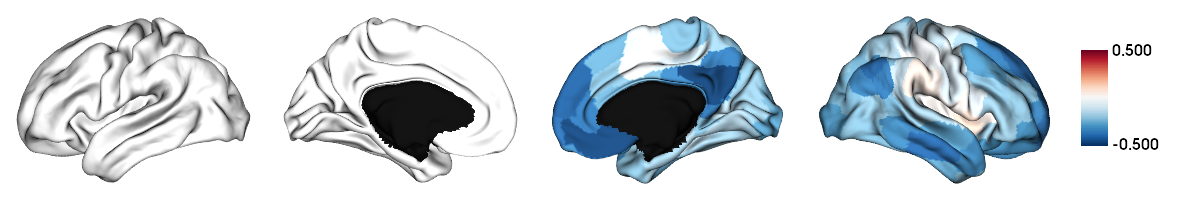

In [3]:
# correlation with Gsconn and project on surface 

f_conn_matrix_r=np.load("/Project1_thalamus_gradients/data/functional_connectivity/fc_l.npy")
f_conn_matrix_r=np.load("/Project1_thalamus_gradients/data/functional_connectivity/fc_r.npy")
gradients_l = np.load("/Project1_thalamus_gradients/data/structural_connectivity/parcels_200/gradients_lh.npy")
gradients_r = np.load("/Project1_thalamus_gradients/data/structural_connectivity/parcels_200/gradients_rh.npy")
schaefer_pc=np.zeros((1,200))

#right hem    
#iterate over columns (~parcels)
for p in range(100):
    x=p+100
    r=np.corrcoef(f_conn_matrix_r[:,p],gradients_r[:,0])[0][1]  #change here depending on which gradient you want to plot
    schaefer_pc[0,x]=r           # fill into vector
np.save("/Project1_thalamus_gradients/data/functional_connectivity/corr_grad1_fconn_on_cortex_rh.npy",schaefer_pc) #change name 

surf_lh, surf_rh = load_conte69()
labeling = load_parcellation('schaefer', scale=200, join=True)
mask = labeling != 0
grad = map_to_labels(schaefer_pc[0,:], labeling, mask , fill=np.nan)

plot_hemispheres(surf_lh, surf_rh, array_name=grad,
                 cmap=cmap,color_bar=True,
                 background=(1,1,1),size=(1200,200), zoom=1.5,
                 color_range= (-0.5,0.5),  
                 embed_nb=True,
                 interactive=False,
                 screenshot=screenshot, 
                 transparent_bg=True,
                 filename = "/Project1_thalamus_gradients/plots/figure3/corr_g1_func_on_cortex_rh_rdbu.png")   #change name 


## G2

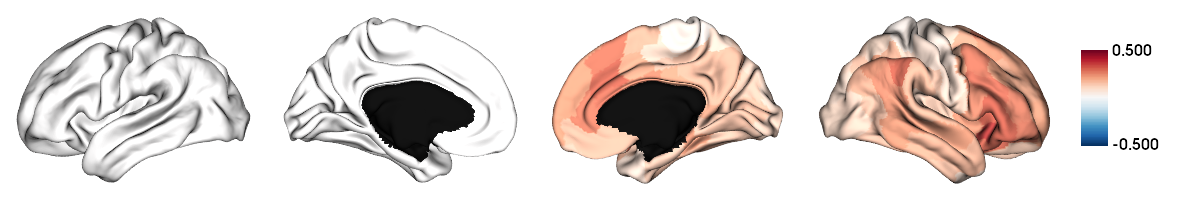

In [4]:
#right hem    
#iterate over columns (~parcels)
for p in range(100):
    x=p+100
    r=np.corrcoef(f_conn_matrix_r[:,p],gradients_r[:,1])[0][1]  #change here depending on which gradient you want to plot
    schaefer_pc[0,x]=r           # fill into vector

np.save("/Project1_thalamus_gradients/data/functional_connectivity/corr_grad2_fconn_on_cortex_rh.npy",schaefer_pc) #change name 
    
surf_lh, surf_rh = load_conte69()
labeling = load_parcellation('schaefer', scale=200, join=True)
mask = labeling != 0
grad = map_to_labels(schaefer_pc[0,:], labeling, mask , fill=np.nan)

plot_hemispheres(surf_lh, surf_rh, array_name=grad,
                 cmap="RdBu_r",color_bar=True,
                 background=(1,1,1),size=(1200,200), zoom=1.5,
                 color_range=(-0.5,0.5), #(-0.5,0.5),
                 embed_nb=True,
                 interactive=False,
                 screenshot=screenshot, 
                 transparent_bg=True,
                 filename = "/Project1_thalamus_gradients/plots/figure3/corr_g2_func_on_cortex_rh_rdbu.png")   #change name 


In [6]:
np.min(schaefer_pc==0)

False

# structural covariance

## G1

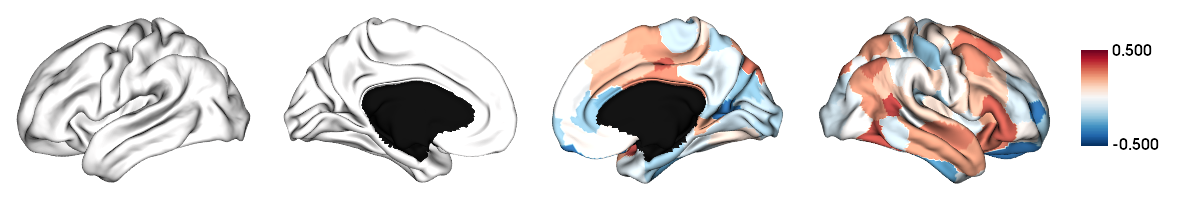

In [14]:
# correlation with Gsconn and project on surface 
s_cov_matrix_r=np.load("/Project1_thalamus_gradients/data/structural_covariance/voxelwise_struc_cov/struc_cov_meanint_rh.npy")


gradients = np.load("/Project1_thalamus_gradients/data/structural_connectivity/parcels_200/gradients_rh.npy")
schaefer_pc=np.zeros((1,200))

for p in range(100): #right hem
    x=p+100
    r=np.corrcoef(s_cov_matrix_r[:,p],gradients_r[:,0])[0][1]  #change here depending on which gradient you want to plot
    schaefer_pc[0,x]=r           # fill into vector

    
np.save("/Project1_thalamus_gradients/data/structural_covariance/voxelwise_struc_cov/meanint_corr_grad1_colums_rh.npy", schaefer_pc)
    
surf_lh, surf_rh = load_conte69()
labeling = load_parcellation('schaefer', scale=200, join=True)
mask = labeling != 0
grad = map_to_labels(schaefer_pc[0,:], labeling, mask , fill=np.nan)

plot_hemispheres(surf_lh, surf_rh, array_name=grad,
                 cmap=cmap,color_bar=True,
                 background=(1,1,1),size=(1200,200),zoom=1.5,
                 color_range= (-0.5,0.5),  #(-0.46,0.46),
                 embed_nb=True,
                 interactive=False,
                 screenshot=screenshot, 
                 transparent_bg=True,
                 filename = "/Project1_thalamus_gradients/plots/figure3/corr_g1_scov_on_cortex_rh_rdbu.png")

## G2

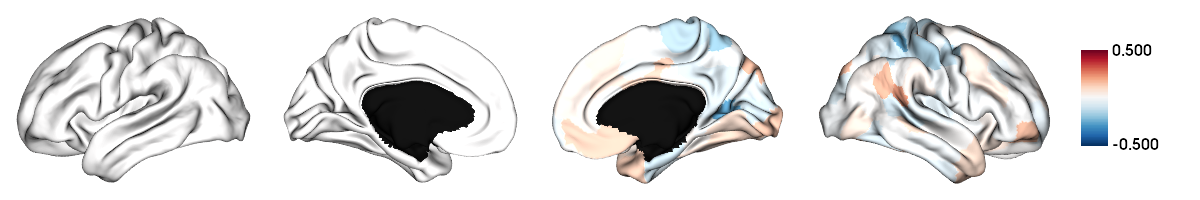

In [24]:
gradients = np.load("/Project1_thalamus_gradients/data/structural_connectivity/parcels_200/gradients_lh.npy")
schaefer_pc=np.zeros((1,200))

for p in range(100): #right hem
    x=p+100
    r=np.corrcoef(s_cov_matrix_r[:,p],gradients_r[:,1])[0][1]  #change here depending on which gradient you want to plot
    schaefer_pc[0,x]=r           # fill into vector

np.save("/Project1_thalamus_gradients/data/structural_covariance/voxelwise_struc_cov/meanint_corr_grad2_colums_rh.npy", schaefer_pc)
    
surf_lh, surf_rh = load_conte69()
labeling = load_parcellation('schaefer', scale=200, join=True)
mask = labeling != 0
grad = map_to_labels(schaefer_pc[0,:], labeling, mask , fill=np.nan)

plot_hemispheres(surf_lh, surf_rh, array_name=grad,
                 cmap=cmap,color_bar=True,
                 background=(1,1,1),size=(1200,200),zoom=1.5,
                 color_range= (-0.5,0.5),   #(-0.27,0.27),
                 embed_nb=True,
                 interactive=False,
                 screenshot=screenshot, 
                 transparent_bg=True,
                 filename = "/Project1_thalamus_gradients/plots/figure3/corr_g2_scov_on_cortex_rh_rdbu.png")